In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt
import xlrd as xl
import seaborn as sb
import random

%matplotlib inline


### Access Data

In [364]:
df= pd.read_csv('data.csv') 
print(df.shape)

(256299, 16)



### Making a sample of 200 rows

In [315]:
np.random.seed(2000)
df_sample=np.random.choice(df.shape[0],200,replace=False)
df_subset=df.loc[df_sample]

In [316]:
print(df_subset.shape)

(200, 16)


In [317]:
df_subset.tail(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
56729,434,2019-03-25 13:11:14.9140,2019-03-25 13:18:29.4850,299.0,Bestor Art Park,37.323678,-121.874119,280.0,San Fernando St at 7th St,37.337122,-121.883215,4011,Subscriber,1996.0,Male,Yes
111728,1074,2019-03-19 06:08:22.8060,2019-03-19 06:26:17.6720,377.0,Fell St at Stanyan St,37.771917,-122.453704,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,6410,Subscriber,1970.0,Female,No


In [318]:
df_subset.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
157521,240,2019-03-14 07:19:38.8090,2019-03-14 07:23:39.7040,211.0,Broadway at 40th St,37.827757,-122.256716,176.0,MacArthur BART Station,37.828410,-122.266315,4560,Subscriber,1987.0,Female,No
151539,385,2019-03-14 16:56:15.0460,2019-03-14 17:02:40.1610,356.0,Valencia St at Clinton Park,37.769188,-122.422285,127.0,Valencia St at 21st St,37.756708,-122.421025,2034,Subscriber,1945.0,Male,Yes


## Data Cleaning 

### checking all columns names 


In [319]:
df_subset.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

#### column name rename

In [320]:
df_subset=df_subset.rename(columns = {'bike_share_for_all_trip':'bikes_shared_for_all_trip'})

In [321]:
df_subset.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bikes_shared_for_all_trip'],
      dtype='object')

#### changing column names to UPPER case

In [322]:
df_subset.columns = df_subset.columns.str.upper()

In [323]:
df_subset.columns

Index(['DURATION_SEC', 'START_TIME', 'END_TIME', 'START_STATION_ID',
       'START_STATION_NAME', 'START_STATION_LATITUDE',
       'START_STATION_LONGITUDE', 'END_STATION_ID', 'END_STATION_NAME',
       'END_STATION_LATITUDE', 'END_STATION_LONGITUDE', 'BIKE_ID', 'USER_TYPE',
       'MEMBER_BIRTH_YEAR', 'MEMBER_GENDER', 'BIKES_SHARED_FOR_ALL_TRIP'],
      dtype='object')

### changing yes and no values with 1 and 0 with the help of map function

In [328]:
#Replacing true/false into 1/0
abc = {'Yes' : 1, 'No' : 0}

#Replacing - with NaN (if required)
#df.replace(-, np.nan)

In [329]:
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].map(abc)

In [333]:
df.head(2)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,53588,2019-03-31 20:59:21.8780,2019-04-01 11:52:30.2000,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,1980.0,Other,0
1,74305,2019-03-31 13:56:46.0050,2019-04-01 10:35:11.4540,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,1990.0,Male,0


#### checking null values

In [334]:
df_subset.isnull().values.any()

True

In [336]:
df_subset.isnull().any()

DURATION_SEC                 False
START_TIME                   False
END_TIME                     False
START_STATION_ID              True
START_STATION_NAME            True
START_STATION_LATITUDE       False
START_STATION_LONGITUDE      False
END_STATION_ID                True
END_STATION_NAME              True
END_STATION_LATITUDE         False
END_STATION_LONGITUDE        False
BIKE_ID                      False
USER_TYPE                    False
MEMBER_BIRTH_YEAR             True
MEMBER_GENDER                 True
BIKES_SHARED_FOR_ALL_TRIP    False
dtype: bool

### Checking how many nulls in coloums?

In [337]:
#print (df['member_birth_year'].isnull().sum())
#df_subset.isnull().sum()
df_subset.isnull().sum().sum()

28

In [338]:
#df_subset.tail(3)

### filling the null values with 0

In [339]:
df_subset.fillna(0)


,DURATION_SEC,START_TIME,END_TIME,START_STATION_ID,START_STATION_NAME,START_STATION_LATITUDE,START_STATION_LONGITUDE,END_STATION_ID,END_STATION_NAME,END_STATION_LATITUDE,END_STATION_LONGITUDE,BIKE_ID,USER_TYPE,MEMBER_BIRTH_YEAR,MEMBER_GENDER,BIKES_SHARED_FOR_ALL_TRIP
157521,240,2019-03-14 07:19:38.8090,2019-03-14 07:23:39.7040,211.0,Broadway at 40th St,37.827757,-122.256716,176.0,MacArthur BART Station,37.828410,-122.266315,4560,Subscriber,1987.0,Female,No
151539,385,2019-03-14 16:56:15.0460,2019-03-14 17:02:40.1610,356.0,Valencia St at Clinton Park,37.769188,-122.422285,127.0,Valencia St at 21st St,37.756708,-122.421025,2034,Subscriber,1945.0,Male,Yes
192075,1669,2019-03-10 13:00:01.7210,2019-03-10 13:27:51.2430,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,381.0,20th St at Dolores St,37.758238,-122.426094,4958,Subscriber,1999.0,Male,No
165775,446,2019-03-13 09:27:59.4970,2019-03-13 09:35:26.2440,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,50.0,2nd St at Townsend St,37.780526,-122.390288,4600,Subscriber,1973.0,Male,No
218781,261,2019-03-06 18:00:16.3790,2019-03-06 18:04:38.2110,89.0,Division St at Potrero Ave,37.769218,-122.407646,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5200,Customer,1981.0,Male,No
78402,721,2019-03-22 08:56:28.5570,2019-03-22 09:08:29.8940,112.0,Harrison St at 17th St,37.763847,-122.413004,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,6222,Subscriber,1989.0,Male,No
113456,1700,2019-03-18 18:52:51.5350,2019-03-18 19:21:12.4290,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,129.0,Harrison St at 20th St,37.758862,-122.412544,6251,Subscriber,1989.0,Male,No
250,847,2019-03-31 21:41:10.4550,2019-03-31 21:55:17.6560,277.0,Morrison Ave at Julian St,37.333658,-121.908586,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,6198,Subscriber,1993.0,Male,Yes
248602,241,2019-03-01 18:58:11.2600,2019-03-01 19:02:12.6600,25.0,Howard St at 2nd St,37.787522,-122.397405,321.0,5th St at Folsom,37.780146,-122.403071,5902,Subscriber,1972.0,Female,No
192743,248,2019-03-10 11:39:28.5710,2019-03-10 11:43:37.2100,77.0,11th St at Natoma St,37.773507,-122.416040,88.0,11th St at Bryant St,37.770030,-122.411726,2403,Subscriber,1991.0,Female,No


In [340]:
df_subset.shape

(200, 16)

### after replacing null values with 0 now dropping null rows

In [341]:
df_subset.shape

(200, 16)

In [342]:
df_drop = df_subset.dropna()
df_drop.shape

(187, 16)

### Identifying duplicate rows

In [344]:
#find duplication in whole dataset
df_subset.duplicated().sum()

0

In [345]:
# Watching duplicated rows in dataset
df_subset.loc[df_subset.duplicated(), :]

,DURATION_SEC,START_TIME,END_TIME,START_STATION_ID,START_STATION_NAME,START_STATION_LATITUDE,START_STATION_LONGITUDE,END_STATION_ID,END_STATION_NAME,END_STATION_LATITUDE,END_STATION_LONGITUDE,BIKE_ID,USER_TYPE,MEMBER_BIRTH_YEAR,MEMBER_GENDER,BIKES_SHARED_FOR_ALL_TRIP


### to make our data more clean we are checking the percentage for yes and no for Bike share for all trip

In [362]:
num_true= len(df.loc[df['bike_share_for_all_trip']== True])
num_false= len(df.loc[df['bike_share_for_all_trip']== False])
print("Number of yes cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false)) * 100))
print("Number of no cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false)) * 100))

Number of yes cases:  22337 (8.72%)
Number of no cases: 233962 (91.28%)


In [372]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,256299.000000,256078.000000,256299.000000,256299.000000,256078.000000,256299.000000,256299.000000,256299.000000,244576.000000
mean,807.873831,141.352424,37.771769,-122.356164,140.011317,37.771933,-122.355815,4916.572531,1984.989050
std,2056.305336,115.408300,0.097027,0.114907,115.386716,0.096979,0.114620,1687.339951,10.077825
min,61.000000,3.000000,37.315158,-122.453704,3.000000,37.315158,-122.453704,11.000000,1878.000000
25%,338.000000,47.000000,37.770083,-122.415204,44.000000,37.770407,-122.413004,4525.000000,1980.000000
50%,542.000000,104.000000,37.780787,-122.398870,102.000000,37.781010,-122.398525,5369.000000,1987.000000
75%,854.000000,240.000000,37.797280,-122.293528,239.000000,37.797320,-122.293528,6127.000000,1992.000000
max,85676.000000,407.000000,37.880222,-121.874119,407.000000,37.880222,-121.874119,7082.000000,2001.000000


### Removing unnecessry columns !! 


In [348]:
df.drop(['end_station_latitude', 'end_station_longitude'], axis=1, inplace= True)

### finding Corelation 

In [349]:
def plot_corr(df, size=11):

    """
        Function plots a graphical correlation matrix for each pair of columns in the dataframe.

        Input:
            df: pandas Dataframe
            size: vertical and horizontal size of the plot

        Displays:
            matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                           0 ------------------------> 1
                                           Expect a darkred line running from top left to bottom right
    """
    corr = df.corr()    #data frame correlation function
    fig, ax = mt.subplots(figsize=(size,size))
    ax.matshow(corr)    # color code  the rectangles by correlation value
    mt.xticks(range(len(corr.columns)), corr.columns)   # draw x tick marks
    mt.yticks(range(len(corr.columns)), corr.columns)   # draw y tick marks

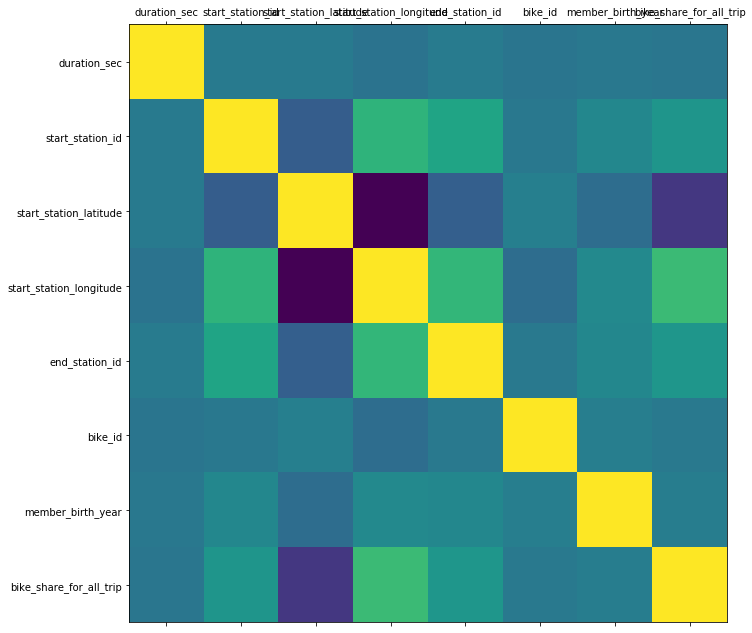

In [350]:
plot_corr(df)

## data analysis

### Question: which user type is more used?

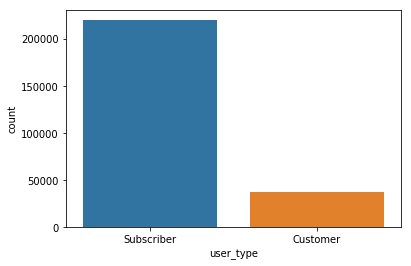

In [371]:
sb.countplot(data=df, x='user_type')

In [ ]:
#plt.plot(us.year, us.population / 10**6)
#plt.plot(china.year, china.population / 10**6)
#plt.legend(['US','China'])
#plt.xlabel('year')
#plt.ylabel('population')
#plt.show()

### Answer: if we see that there are more subscriber than customers 

### Question how many members according to gender traveled ?

(-1.1173769828803632,
 1.120229300949142,
 -1.1184591308978344,
 1.1191471529316708)

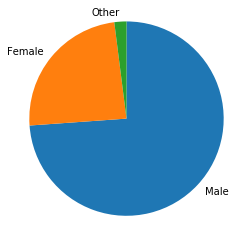

In [352]:
mycolor = sb.color_palette()[2]
sorted_count = df['member_gender'].value_counts()
#sb.countplot(data=dt, x='start_station_name', color = mycolor, order = od)
mt.pie(sorted_count, labels=sorted_count.index, startangle=90, counterclock=False)
mt.axis('square')

### Qustion:youngest and oldest member birth year?

In [357]:
df['member_birth_year'].max()

2001.0

In [363]:
df['member_birth_year'].min()

1878.0

### Question:according to dataset in which decade we got more users?

(array([2.00000e+00, 1.10000e+01, 1.05000e+02, 0.00000e+00, 1.00000e+01,
        1.88000e+02, 3.60000e+02, 3.19800e+03, 1.37990e+04, 2.88000e+04,
        7.76680e+04, 1.09802e+05, 1.06330e+04]),
 array([1878., 1888., 1898., 1908., 1918., 1928., 1938., 1948., 1958.,
        1968., 1978., 1988., 1998., 2008.]),
 <a list of 13 Patch objects>)

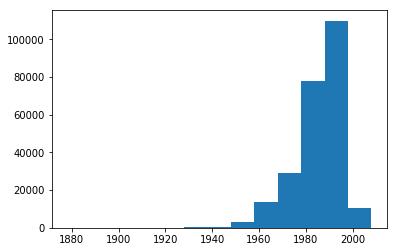

In [405]:
bins = np.arange(df['member_birth_year'].min(),df['member_birth_year'].max()+10,10)
mt.hist(data=df,x='member_birth_year',bins=bins)

### Answer:the most numbers of user we get in the year 1990

In [400]:
np.random.seed(2000)
df_sample=np.random.choice(df.shape[0],50,replace=False)
df_subset=df.loc[df_sample]

## bivariate

### Question: how much start station id affect end station id?

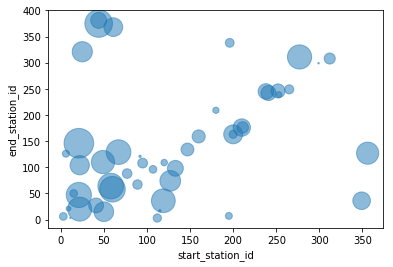

In [414]:

mt.scatter(data=df_subset, x='start_station_id',y='end_station_id', s=area, alpha=0.5)
mt.xlabel('start_station_id')

mt.ylabel('end_station_id')
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

### Answer: this above figure shows that how things are overlapped and how the affect each other

### multivariate

### Question: how many male and female travled within seconds duration in different years

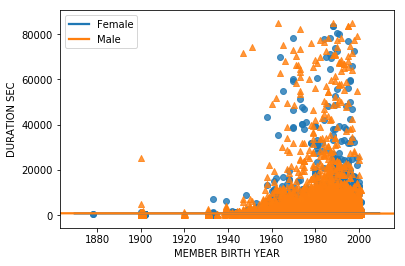

In [429]:
ttype_markers = [['Female', 'o'], ['Male','^']]
for ttype,markers in ttype_markers:
    plot_data=df.loc[df['member_gender']==ttype]
    sb.regplot(data=plot_data,x='member_birth_year', y='duration_sec',x_jitter = 0.04, marker =markers )
    mt.xlabel('MEMBER BIRTH YEAR');
    mt.ylabel('DURATION SEC');
    mt.legend(['Female', 'Male']);

### Answer: as we can see that line shows the years and blue color shows female and orange color shows male and we see clearly that how they travled with respect to year and time i.e seconds